# Basic workflows

In [1]:
%load_ext autoreload
%autoreload 2

import cfr

## Create a reconstruction job object

In [2]:
job = cfr.ReconJob(verbose=True)
print(job)

>>> job.configs:
{}


## Load a proxy database

In [3]:
job.load_proxydb('./data/pages2k_dataset.pkl', verbose=True)

>>> job.configs["proxydb_path"] = ./data/pages2k_dataset.pkl
>>> 692 records loaded
>>> job.proxydb created


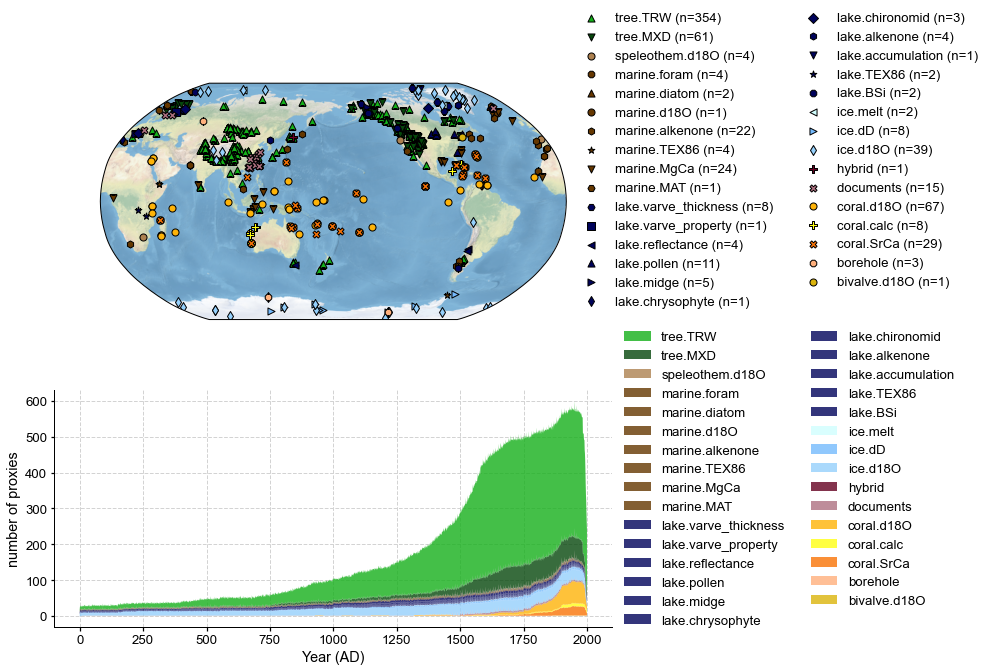

In [4]:
fig, ax = job.proxydb.plot(plot_count=True)

## Filter a proxy database

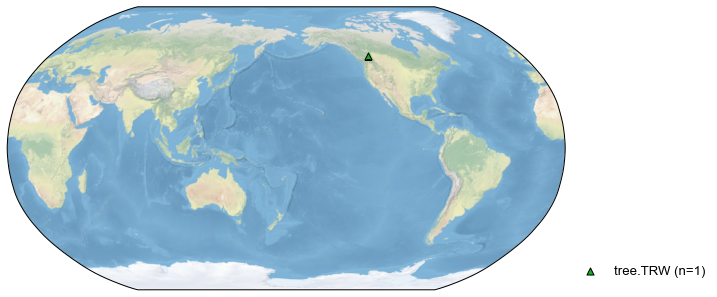

In [5]:
# filtering a ProxyDatabase object returns a new ProxyDatabase object
pdb_tree = job.proxydb.filter(by='pid', keys=['NAm_153'])
fig, ax = pdb_tree.plot()

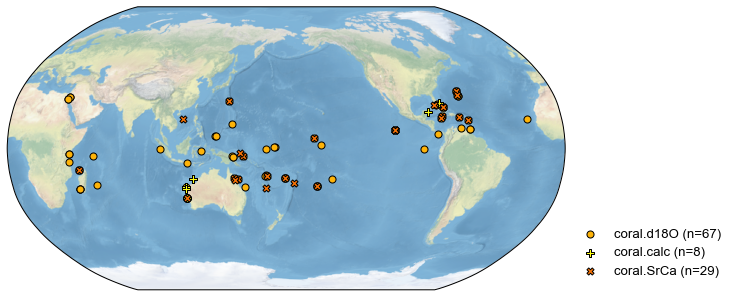

In [6]:
# job.filter_proxydb() will, however, modify job.proxydb by default,
# unless we set inplace=False for a test
pdb_filtered = job.filter_proxydb(by='ptype', keys=['coral'], verbose=True, inplace=False)
fig, ax = pdb_filtered.plot()

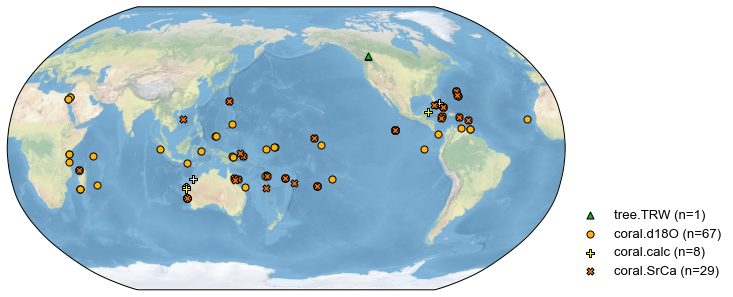

In [7]:
# we may merge several ProxyDatabase's and form a job.proxydb
job.proxydb = pdb_filtered + pdb_tree
fig, ax = job.proxydb.plot()

## Annualize/seasonalize the proxy database

Annualizing ProxyRecord: 100%|██████████| 104/104 [00:03<00:00, 26.07it/s]


>>> 61 records remaining
>>> job.proxydb updated


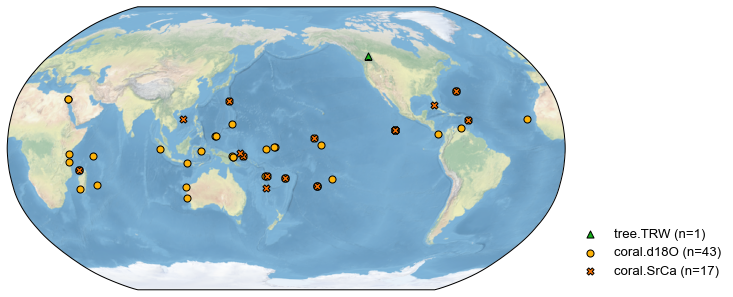

In [8]:
# we only annualize coral records
job.annualize_proxydb(months=[6, 7, 8], ptypes=['coral'], verbose=True)
fig, ax = job.proxydb.plot()

In [9]:
# let's check the time axis of the coral record
job.proxydb.records['Ocn_076'].time

array([1887., 1888., 1889., 1890., 1891., 1892., 1893., 1894., 1895.,
       1896., 1897., 1898., 1899., 1900., 1901., 1902., 1903., 1904.,
       1905., 1906., 1907., 1908., 1909., 1910., 1911., 1912., 1913.,
       1914., 1915., 1916., 1917., 1918., 1919., 1920., 1921., 1922.,
       1923., 1924., 1925., 1926., 1927., 1928., 1929., 1930., 1931.,
       1932., 1933., 1934., 1935., 1936., 1937., 1938., 1939., 1940.,
       1941., 1942., 1943., 1944., 1945., 1946., 1947., 1948., 1949.,
       1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958.,
       1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967.,
       1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976.,
       1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985.,
       1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994.,
       1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002.])

## Load climate model priors

In [10]:
job.load_clim(
    tag='prior',
    path_dict={
        'tas': './data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc',
        'pr': './data/pr_sfc_Amon_iCESM_past1000historical_085001-200512.nc',
    },
    center_period=(1951, 1980),
    verbose=True,
)

>>> job.configs["prior_path"] = {'tas': './data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc', 'pr': './data/pr_sfc_Amon_iCESM_past1000historical_085001-200512.nc'}
>>> instrumental observation variables ['tas', 'pr'] loaded
>>> job.prior created


## Load instrumental observations

In [11]:
job.load_clim(
    tag='obs',
    path_dict={
        'tas': './data/gistemp1200_ERSSTv4.nc',
        'pr': './data/GPCC_precip.mon.flux.1x1.v6.nc',
    },
    rename_dict={'tas': 'tempanomaly', 'pr': 'precip'},
    center_period=(1951, 1980),
    verbose=True,
)

>>> job.configs["obs_path"] = {'tas': './data/gistemp1200_ERSSTv4.nc', 'pr': './data/GPCC_precip.mon.flux.1x1.v6.nc'}
>>> instrumental observation variables ['tas', 'pr'] loaded
>>> job.obs created


In [12]:
# note that the lon axis has been wrapped into the 0-360 range
job.obs['tas'].da

<xarray.DataArray 'tas' (time: 1648, lat: 90, lon: 180)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [ 1.56      ,  1.56      ,  1.56      , ...,  1.56      ,
          1.56      ,  1.56      ],
        [ 1.56      ,  1.56      ,  1.56      , ...,  1.56      ,
          1.56      ,  1.56      ],
        [ 1.56      ,  1.56      ,  1.56      , ...,  1.56      ,
          1.56      ,  1.56      ]],

       [[-1.0299653 , -1.0299653 , -1.0299653 , ..., -1.0299653 ,
         -1.0299653 , -1.0299653 ],
        [-1.0299653 , -1.0299653 , -1.0299653 , ..., -1.0299653 ,
         -1.0299653 , -1.0299653 ],
        [-1.0299653 , -1.0299653 , -1.0299653 , ..., -1.0299653 ,
         -1.0299653 , -1.0299653 ],
        ...,
        [-0.29999998, -0.29999998, -0.29999998, ..., -0.29999998,
         -0.29999998, -0.29999998],
        [-0.29999998, -0.29999998, -0.29999998, ..., -0.29999998,
         -0.29999998, -0.29999998],
        [-0.29999998, -0.29999998, -0.29999998, ..., -0.29999998,
         -0.29999998, -0.29999998]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * time     (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2017-04-15

In [13]:
# now let's check out configurations
job.configs

{'proxydb_path': './data/pages2k_dataset.pkl',
 'prior_path': {'tas': './data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc',
  'pr': './data/pr_sfc_Amon_iCESM_past1000historical_085001-200512.nc'},
 'obs_path': {'tas': './data/gistemp1200_ERSSTv4.nc',
  'pr': './data/GPCC_precip.mon.flux.1x1.v6.nc'}}

## Calibrate the PSMs

In [14]:
ptype_psm_dict = {
    'coral.d18O': 'Linear',
    'coral.SrCa': 'Linear',
    'tree.TRW': 'Bilinear',
}
ptype_season_dict = {
    'coral.d18O': [6, 7, 8],
    'coral.SrCa': [6, 7, 8],
    'tree.TRW': [
        [1,2,3,4,5,6,7,8,9,10,11,12],
        [6,7,8],
        [3,4,5,6,7,8],
        [6,7,8,9,10,11],
        [-12,1,2],
        [-9,-10,-11,-12,1,2],
        [-12,1,2,3,4,5],
    ],
}
job.calib_psms(ptype_psm_dict=ptype_psm_dict, ptype_season_dict=ptype_season_dict, verbose=True)

>>> job.configs["ptype_psm_dict"] = {'coral.d18O': 'Linear', 'coral.SrCa': 'Linear', 'tree.TRW': 'Bilinear'}
>>> job.configs["ptype_season_dict"] = {'coral.d18O': [6, 7, 8], 'coral.SrCa': [6, 7, 8], 'tree.TRW': [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [6, 7, 8], [3, 4, 5, 6, 7, 8], [6, 7, 8, 9, 10, 11], [-12, 1, 2], [-9, -10, -11, -12, 1, 2], [-12, 1, 2, 3, 4, 5]]}
>>> job.configs["psm_calib_period"] = (1850, 2015)


Calibrating the PSMs::  52%|█████▏    | 32/61 [00:02<00:01, 15.88it/s]

The number of overlapped data points is 0 < 25. Skipping ...


Calibrating the PSMs:: 100%|██████████| 61/61 [00:06<00:00,  9.38it/s]

>>> The PSM for Ocn_138 failed to calibrate.
>>> 60 records tagged "calibrated" with ProxyRecord.psm created


In [15]:
# check the fitting R-squared
job.proxydb.records['NAm_153'].psm.calib_details['fitR2adj']

0.13500868898269947

## Forward the PSMs

In [16]:
job.forward_psms(verbose=True)

Forwarding the PSMs:: 100%|██████████| 60/60 [00:17<00:00,  3.44it/s]

>>> ProxyRecord.pseudo created for 60 records


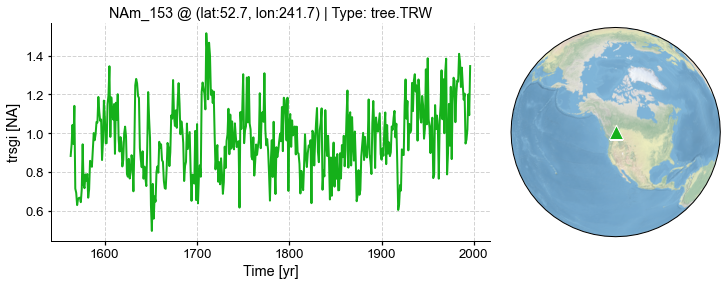

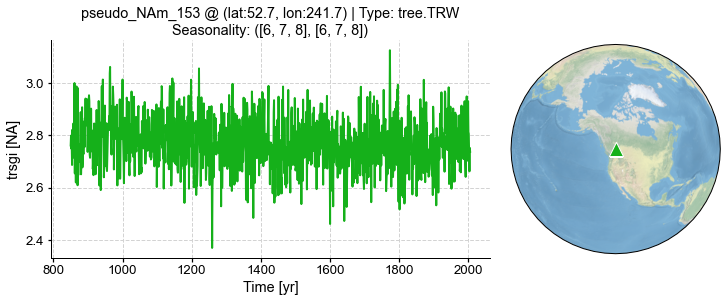

In [17]:
for pid, pobj in job.proxydb.filter(by='pid', keys=['NAm_153']).records.items():
    fig, ax = pobj.plot()
    fig, ax = pobj.pseudo.plot()

In [18]:
# let's add the pids into the configurations
job.write_cfg('pids', job.proxydb.pids, verbose=True)
job.configs

>>> job.configs["pids"] = ['Ocn_075', 'Ocn_167', 'Ocn_091', 'Ocn_093', 'Ocn_096', 'Ocn_086', 'Ocn_101', 'Ocn_070', 'Ocn_076', 'Ocn_099', 'Ocn_178', 'Ocn_177', 'Ocn_080', 'Ocn_103', 'Ocn_068', 'Ocn_069', 'Ocn_098', 'Ocn_180', 'Ocn_130', 'Ocn_131', 'Ocn_147', 'Ocn_077', 'Ocn_083', 'Ocn_160', 'Ocn_166', 'Ocn_123', 'Ocn_179', 'Ocn_082', 'Ocn_138', 'Ocn_088', 'Ocn_129', 'Ocn_084', 'Ocn_114', 'Ocn_081', 'Ocn_120', 'Ocn_121', 'Ocn_127', 'Ocn_128', 'Ocn_074', 'Ocn_118', 'Ocn_139', 'Ocn_061', 'Ocn_062', 'Ocn_079', 'Ocn_095', 'Ocn_104', 'Ocn_107', 'Ocn_146', 'Ocn_181', 'Ocn_182', 'Ocn_162', 'Ocn_163', 'Ocn_161', 'Ocn_125', 'Ocn_090', 'Ocn_119', 'Ocn_097', 'Ocn_159', 'Ocn_071', 'Ocn_072', 'NAm_153']


{'proxydb_path': './data/pages2k_dataset.pkl',
 'prior_path': {'tas': './data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc',
  'pr': './data/pr_sfc_Amon_iCESM_past1000historical_085001-200512.nc'},
 'obs_path': {'tas': './data/gistemp1200_ERSSTv4.nc',
  'pr': './data/GPCC_precip.mon.flux.1x1.v6.nc'},
 'ptype_psm_dict': {'coral.d18O': 'Linear',
  'coral.SrCa': 'Linear',
  'tree.TRW': 'Bilinear'},
 'ptype_season_dict': {'coral.d18O': [6, 7, 8],
  'coral.SrCa': [6, 7, 8],
  'tree.TRW': [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
   [6, 7, 8],
   [3, 4, 5, 6, 7, 8],
   [6, 7, 8, 9, 10, 11],
   [-12, 1, 2],
   [-9, -10, -11, -12, 1, 2],
   [-12, 1, 2, 3, 4, 5]]},
 'psm_calib_period': (1850, 2015),
 'pids': ['Ocn_075',
  'Ocn_167',
  'Ocn_091',
  'Ocn_093',
  'Ocn_096',
  'Ocn_086',
  'Ocn_101',
  'Ocn_070',
  'Ocn_076',
  'Ocn_099',
  'Ocn_178',
  'Ocn_177',
  'Ocn_080',
  'Ocn_103',
  'Ocn_068',
  'Ocn_069',
  'Ocn_098',
  'Ocn_180',
  'Ocn_130',
  'Ocn_131',
  'Ocn_147',
  'Ocn_07

## Annualize/seasonalize the climate model prior

>>> job.configs["prior_annualize_months"] = [6, 7, 8]
>>> Processing tas ...
>>> Processing pr ...
>>> job.prior updated


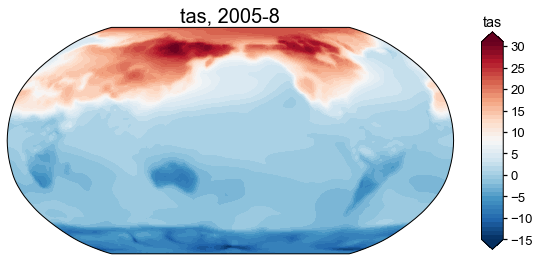

In [19]:
job.annualize_clim(tag='prior', verbose=True, months=[6, 7, 8])
fig, ax = job.prior['tas'].plot(it=-1)

In [20]:
job.prior['tas'].time

array([ 850.,  851.,  852., ..., 2003., 2004., 2005.])

In [21]:
job.regrid_clim(tag='prior', nlat=42, nlon=63, verbose=True)
job.prior['tas'].da

>>> job.configs["prior_regrid_nlat"] = 42
>>> job.configs["prior_regrid_nlon"] = 63
>>> Processing tas ...
>>> Processing pr ...


<xarray.DataArray 'tas' (time: 1156, lat: 42, lon: 63)>
array([[[ -7.47643518,  -7.51106125,  -7.60682241, ...,  -7.61908068,
          -7.52936638,  -7.47643518],
        [ -9.42977243,  -9.21364785,  -8.86146122, ...,  -9.45751958,
          -9.48816517,  -9.42977243],
        [-11.21933535, -11.02493929, -10.24814865, ..., -11.40715016,
         -11.32899803, -11.21933535],
        ...,
        [ 14.3567651 ,  13.71429314,  13.64500353, ...,  15.90731181,
          15.31555513,  14.3567651 ],
        [ 17.63995069,  17.4853255 ,  17.30944453, ...,  18.25940938,
          17.91855767,  17.63995069],
        [ 18.94141579,  18.93667196,  18.92585822, ...,  18.96997372,
          18.95361359,  18.94141579]],

       [[ -8.11308289,  -8.14893049,  -8.24326463, ...,  -8.25515156,
          -8.16677331,  -8.11308289],
        [ -9.96100292,  -9.97281143,  -9.79959508, ...,  -9.5524724 ,
          -9.80851089,  -9.96100292],
        [ -9.46036908,  -9.92644796, -10.13992205, ...,  -8.78133766,
          -8.99808642,  -9.46036908],
...
        [ 14.53631427,  13.66631166,  13.66456364, ...,  16.23888786,
          15.70978998,  14.53631427],
        [ 17.16435759,  17.05403509,  17.00732885, ...,  17.63017439,
          17.36501944,  17.16435759],
        [ 18.12553978,  18.13750532,  18.13620346, ...,  18.13540176,
          18.12712891,  18.12553978]],

       [[ -8.02508545,  -8.05244784,  -8.15332905, ...,  -8.16716757,
          -8.07882773,  -8.02508545],
        [ -9.49518864,  -9.16392655,  -8.74296983, ...,  -9.76262733,
          -9.68813762,  -9.49518864],
        [-11.93293941, -11.32976721, -10.41667034, ..., -12.37823061,
         -12.1428479 , -11.93293941],
        ...,
        [ 15.14224109,  14.13358768,  14.08309544, ...,  17.36154388,
          16.55513144,  15.14224109],
        [ 19.38425552,  19.14868929,  18.96859062, ...,  20.08208032,
          19.72616568,  19.38425552],
        [ 21.30426979,  21.3106148 ,  21.30226732, ...,  21.32455081,
          21.31077791,  21.30426979]]])
Coordinates:
  * time     (time) object 0850-08-31 00:00:00 ... 2005-08-31 00:00:00
  * lon      (lon) float64 0.0 5.806 11.61 17.42 ... 342.6 348.4 354.2 360.0
  * lat      (lat) float64 -90.0 -85.61 -81.22 -76.83 ... 76.83 81.22 85.61 90.0

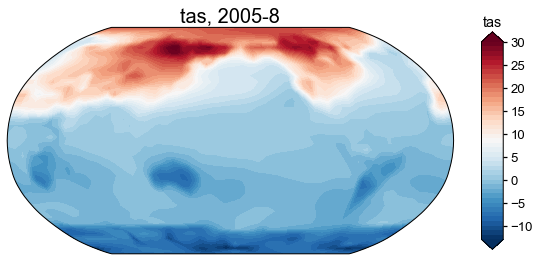

In [22]:
fig, ax = job.prior['tas'].plot(-1)

## Crop the prior

In [23]:
# let's backup our prior
prior_bak = job.prior.copy()

>>> job.configs["prior_lat_min"] = -10
>>> job.configs["prior_lat_max"] = 10
>>> job.configs["prior_lon_min"] = 0
>>> job.configs["prior_lon_max"] = 360
>>> Processing tas ...
>>> Processing pr ...


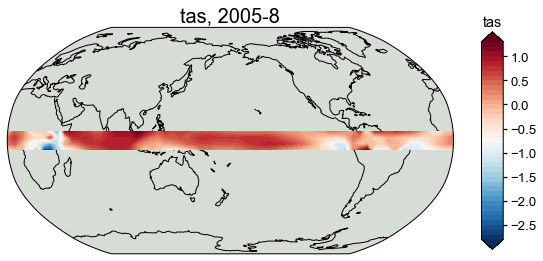

In [24]:
# just for a test
job.crop_clim('prior', lat_min=-10, lat_max=10, verbose=True)
fig, ax = job.prior['tas'].plot(-1)

>>> job.configs["prior_lat_min"] dropped
>>> job.configs["prior_lat_max"] dropped
>>> job.configs["prior_lon_min"] dropped
>>> job.configs["prior_lon_max"] dropped


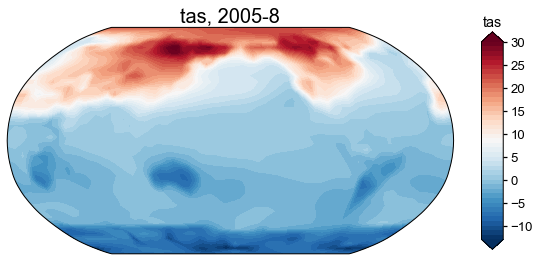

In [25]:
# let's recover our prior and remove the items in the configs
job.prior = prior_bak
fig, ax = job.prior['tas'].plot(-1)

job.erase_cfg(['prior_lat_min', 'prior_lat_max', 'prior_lon_min', 'prior_lon_max'], verbose=True)

In [26]:
job.configs

{'proxydb_path': './data/pages2k_dataset.pkl',
 'prior_path': {'tas': './data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc',
  'pr': './data/pr_sfc_Amon_iCESM_past1000historical_085001-200512.nc'},
 'obs_path': {'tas': './data/gistemp1200_ERSSTv4.nc',
  'pr': './data/GPCC_precip.mon.flux.1x1.v6.nc'},
 'ptype_psm_dict': {'coral.d18O': 'Linear',
  'coral.SrCa': 'Linear',
  'tree.TRW': 'Bilinear'},
 'ptype_season_dict': {'coral.d18O': [6, 7, 8],
  'coral.SrCa': [6, 7, 8],
  'tree.TRW': [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
   [6, 7, 8],
   [3, 4, 5, 6, 7, 8],
   [6, 7, 8, 9, 10, 11],
   [-12, 1, 2],
   [-9, -10, -11, -12, 1, 2],
   [-12, 1, 2, 3, 4, 5]]},
 'psm_calib_period': (1850, 2015),
 'pids': ['Ocn_075',
  'Ocn_167',
  'Ocn_091',
  'Ocn_093',
  'Ocn_096',
  'Ocn_086',
  'Ocn_101',
  'Ocn_070',
  'Ocn_076',
  'Ocn_099',
  'Ocn_178',
  'Ocn_177',
  'Ocn_080',
  'Ocn_103',
  'Ocn_068',
  'Ocn_069',
  'Ocn_098',
  'Ocn_180',
  'Ocn_130',
  'Ocn_131',
  'Ocn_147',
  'Ocn_07

## Saving the `job` object

In [27]:
job.save(save_dirpath='./data/exp_test', verbose=True)

>>> job.configs["save_dirpath"] = ./data/exp_test
>>> job saved to: ./data/exp_test


In [28]:
import pandas as pd
job = pd.read_pickle('./data/exp_test/job.pkl')
job.configs

{'proxydb_path': './data/pages2k_dataset.pkl',
 'prior_path': {'tas': './data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc',
  'pr': './data/pr_sfc_Amon_iCESM_past1000historical_085001-200512.nc'},
 'obs_path': {'tas': './data/gistemp1200_ERSSTv4.nc',
  'pr': './data/GPCC_precip.mon.flux.1x1.v6.nc'},
 'ptype_psm_dict': {'coral.d18O': 'Linear',
  'coral.SrCa': 'Linear',
  'tree.TRW': 'Bilinear'},
 'ptype_season_dict': {'coral.d18O': [6, 7, 8],
  'coral.SrCa': [6, 7, 8],
  'tree.TRW': [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
   [6, 7, 8],
   [3, 4, 5, 6, 7, 8],
   [6, 7, 8, 9, 10, 11],
   [-12, 1, 2],
   [-9, -10, -11, -12, 1, 2],
   [-12, 1, 2, 3, 4, 5]]},
 'psm_calib_period': (1850, 2015),
 'pids': ['Ocn_075',
  'Ocn_167',
  'Ocn_091',
  'Ocn_093',
  'Ocn_096',
  'Ocn_086',
  'Ocn_101',
  'Ocn_070',
  'Ocn_076',
  'Ocn_099',
  'Ocn_178',
  'Ocn_177',
  'Ocn_080',
  'Ocn_103',
  'Ocn_068',
  'Ocn_069',
  'Ocn_098',
  'Ocn_180',
  'Ocn_130',
  'Ocn_131',
  'Ocn_147',
  'Ocn_07

## Data assimilation

### Randomly pick proxy records

In [29]:
job.split_proxydb(verbose=True)

>>> job.configs["proxy_assim_frac"] = 0.75
>>> 45 records tagged "assim"
>>> 15 records tagged "eval"


In [30]:
solver = cfr.EnKF(job.prior, job.proxydb)

In [31]:
solver.gen_Ye()

In [32]:
solver.Ye_df['assim']

,Ocn_075,Ocn_167,Ocn_091,Ocn_093,Ocn_096,Ocn_101,Ocn_076,Ocn_099,Ocn_178,Ocn_177,...,Ocn_146,Ocn_182,Ocn_162,Ocn_161,Ocn_125,Ocn_090,Ocn_119,Ocn_159,Ocn_071,NAm_153
850.0,-3.519337,82.182338,-4.888169,9.283320,9.611736,9.384249,-4.272639,-4.101401,-4.069964,-4.499031,...,-3.019623,8.929304,-5.429753,9.168976,-3.927448,-4.834641,-5.643084,9.244370,-4.347695,2.761095
851.0,-3.674746,82.123486,-4.830815,9.296388,9.638102,9.404577,-4.309252,-4.148236,-3.970862,-4.727764,...,-3.053868,8.931184,-5.430505,9.165589,-3.839868,-4.798883,-5.654666,9.240304,-4.311793,2.798881
852.0,-3.549114,82.616301,-4.833275,9.295828,9.604393,9.456641,-4.370254,-4.146898,-4.097561,-4.832830,...,-3.036875,8.953881,-5.437441,9.134365,-3.951837,-4.667579,-5.761440,9.202820,-4.320646,2.748967
853.0,-3.631657,82.408195,-4.919906,9.276089,9.617758,9.433701,-4.454866,-4.103947,-4.047329,-4.814575,...,-3.037359,8.937767,-5.438284,9.130569,-3.907444,-4.750159,-5.774421,9.198263,-4.371242,2.767979
854.0,-3.587934,82.268446,-4.855342,9.290800,9.599821,9.437830,-4.392440,-4.135122,-4.114748,-4.789666,...,-3.038990,8.939423,-5.435075,9.145018,-3.967025,-4.711423,-5.725011,9.215609,-4.363903,2.686620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001.0,-3.639456,82.122759,-4.972232,9.264167,9.594937,9.377941,-4.461657,-4.181129,-4.133104,-4.663537,...,-3.026209,8.926116,-5.432952,9.154573,-3.983247,-4.882937,-5.692336,9.227080,-4.363652,2.805581
2002.0,-3.657102,82.306405,-4.819433,9.298981,9.650913,9.409365,-4.477155,-4.156181,-3.922708,-5.045138,...,-3.031850,8.933604,-5.450181,9.077011,-3.797312,-4.830763,-5.957572,9.133966,-4.394842,2.726365
2003.0,-3.687872,81.929340,-4.946673,9.269990,9.628430,9.363300,-4.550425,-4.086154,-4.007215,-4.873806,...,-3.034867,8.916832,-5.445686,9.097247,-3.871994,-4.828040,-5.888371,9.158260,-4.404380,2.662333
2004.0,-3.625513,82.240166,-4.878689,9.285480,9.583606,9.393800,-4.513063,-4.197950,-4.175694,-4.606025,...,-3.045444,8.937260,-5.433357,9.152751,-4.020886,-4.867223,-5.698569,9.224892,-4.377082,2.751794
